In [27]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
# This notebook is parly based on a notebook written by Wouter Gevaert

We will simulate a dataset ourselves, which we will use to demonstrate several clustering algorithms

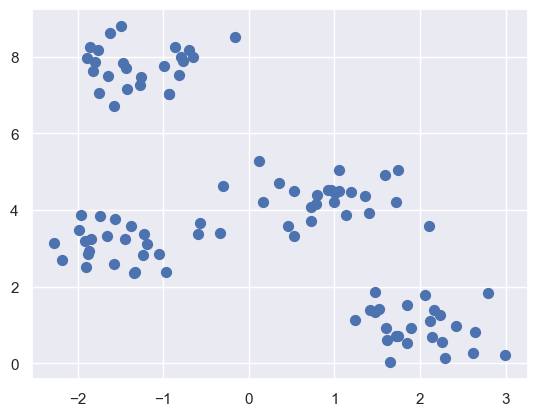

In [58]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, center_box = (-10,10),
                  random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], s=50);

# 1. K-means step by step

The first algorithm that we will see, is K-means. First, we demonstrate how the algorithm works, step bu step.

## 1.1 Chose centroids

We randomly choose 4 centroids (Note that better initialization techniques can be used - see kmeans ++ in the slides)

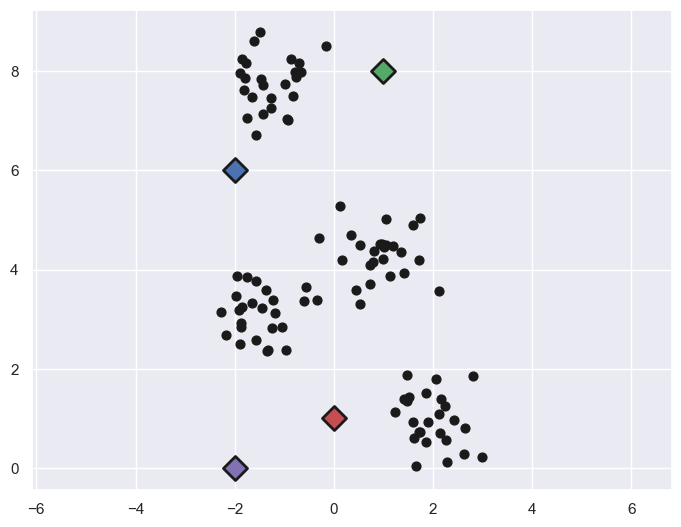

In [29]:
# define 4 points
c0 = np.array([0.0,1.0])
c1 = np.array([-2.0,6.0])
c2 = np.array([1.0,8.0])
c3 = np.array([-2.0,0.0])

# plot these points on the dataset
fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')
plt.scatter(X[:, 0], X[:, 1], c='k',s=40);
plt.scatter(c0[0],c0[1], c='r',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c1[0],c1[1], c='b',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c2[0],c2[1], c='g',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c3[0],c3[1], c='m',s=150,marker="D",edgecolor='k',linewidths=2)


## 1.2 Assign points to closest centroid

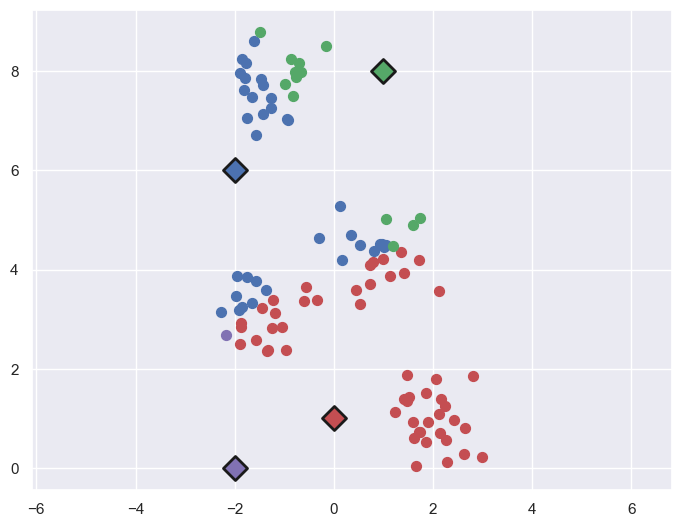

In [30]:
d = np.zeros(4)
y_kmeans = np.zeros(len(X))
x0 = X[:,0]
x1 = X[:,1]

# for each point in x, calculate the distances to the 4 centroids
for n in range(0,len(X)):
    d[0]= np.sqrt((c0[0]-x0[n])**2 + (c0[1]-x1[n])**2)
    d[1]= np.sqrt((c1[0]-x0[n])**2 + (c1[1]-x1[n])**2)
    d[2]= np.sqrt((c2[0]-x0[n])**2 + (c2[1]-x1[n])**2)
    d[3]= np.sqrt((c3[0]-x0[n])**2 + (c3[1]-x1[n])**2)
    # and choose the minumum distance
    y_kmeans[n]=np.argmin(d)

y_kmeans = y_kmeans.astype('int')   

# assign the points to a class depending on the results
class0 = (y_kmeans==0)
class1 = (y_kmeans==1)
class2 = (y_kmeans==2)
class3 = (y_kmeans==3)

# plot the points, use different collor for each class
fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')
ax_kmeans.scatter(x0[class0],x1[class0] ,c='r',s=50,label='class0')
ax_kmeans.scatter(x0[class1],x1[class1] ,c='b',s=50,label='class1')
ax_kmeans.scatter(x0[class2],x1[class2] ,c='g',s=50,label='class2')
ax_kmeans.scatter(x0[class3],x1[class3] ,c='m',s=50,label='class3')

# also plot the centroids again
plt.scatter(c0[0],c0[1], c='r',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c1[0],c1[1], c='b',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c2[0],c2[1], c='g',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c3[0],c3[1], c='m',s=150,marker="D",edgecolor='k',linewidths=2)
    

## 1.3  Calculate mean per cluster to get new centroids and repeat


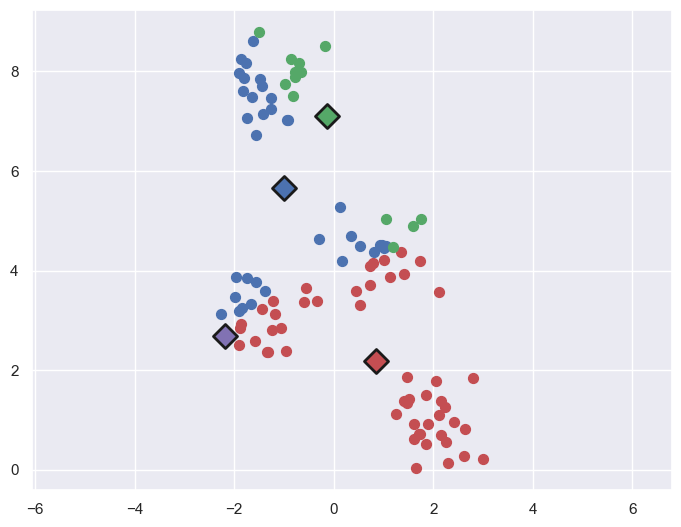

In [31]:
# Update the centroids and plot these
c0 = [np.mean(x0[class0]),np.mean(x1[class0])]
c1 = [np.mean(x0[class1]),np.mean(x1[class1])]
c2 = [np.mean(x0[class2]),np.mean(x1[class2])]
c3 = [np.mean(x0[class3]),np.mean(x1[class3])]

fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')
x0 = X[:, 0]
x1 = X[:, 1]
ax_kmeans.scatter(x0[class0],x1[class0] ,c='r',s=50,label='class0')
ax_kmeans.scatter(x0[class1],x1[class1] ,c='b',s=50,label='class1')
ax_kmeans.scatter(x0[class2],x1[class2] ,c='g',s=50,label='class2')
ax_kmeans.scatter(x0[class3],x1[class3] ,c='m',s=50,label='class3')

plt.scatter(c0[0],c0[1], c='r',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c1[0],c1[1], c='b',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c2[0],c2[1], c='g',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c3[0],c3[1], c='m',s=150,marker="D",edgecolor='k',linewidths=2)


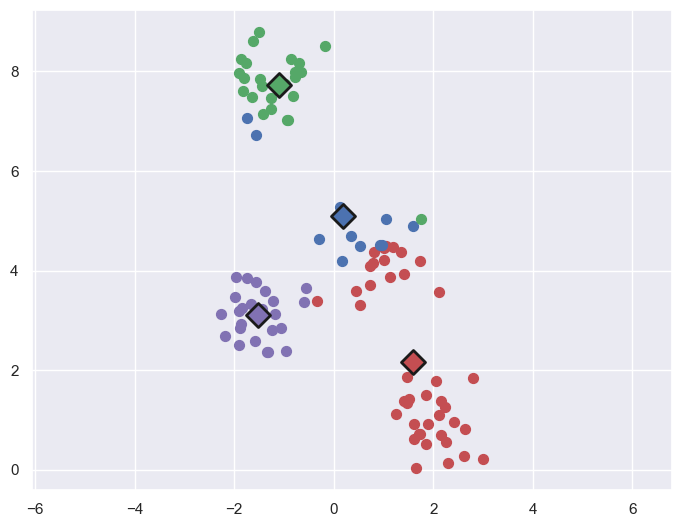

In [32]:
#Repeat this code untill convergence (= points nog longer change)

# reassign the points to the closest centroid

for n in range(0,len(X)):
    d[0]= np.sqrt((c0[0]-x0[n])**2 + (c0[1]-x1[n])**2)
    d[1]= np.sqrt((c1[0]-x0[n])**2 + (c1[1]-x1[n])**2)
    d[2]= np.sqrt((c2[0]-x0[n])**2 + (c2[1]-x1[n])**2)
    d[3]= np.sqrt((c3[0]-x0[n])**2 + (c3[1]-x1[n])**2)
    y_kmeans[n]=np.argmin(d)
    
y_kmeans = y_kmeans.astype('int')   


class0 = (y_kmeans==0)
class1 = (y_kmeans==1)
class2 = (y_kmeans==2)
class3 = (y_kmeans==3)

c0 = [np.mean(x0[class0]),np.mean(x1[class0])]
c1 = [np.mean(x0[class1]),np.mean(x1[class1])]
c2 = [np.mean(x0[class2]),np.mean(x1[class2])]
c3 = [np.mean(x0[class3]),np.mean(x1[class3])]


fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')
x0 = X[:, 0]
x1 = X[:, 1]
ax_kmeans.scatter(x0[class0],x1[class0] ,c='r',s=50,label='class0')
ax_kmeans.scatter(x0[class1],x1[class1] ,c='b',s=50,label='class1')
ax_kmeans.scatter(x0[class2],x1[class2] ,c='g',s=50,label='class2')
ax_kmeans.scatter(x0[class3],x1[class3] ,c='m',s=50,label='class3')

plt.scatter(c0[0],c0[1], c='r',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c1[0],c1[1], c='b',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c2[0],c2[1], c='g',s=150,marker="D",edgecolor='k',linewidths=2)
plt.scatter(c3[0],c3[1], c='m',s=150,marker="D",edgecolor='k',linewidths=2)


# 2. K-means using sklearn

Offcourse it is much easier to just use the existing function from sklearn. Here, we know we have 4 clusters (because we simulated the data ourselves), but often you will not have this information and will need to decide how many clusters you need.

In [54]:
from sklearn.cluster import KMeans
kmeans : KMeans(4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 2.1 Determining number of clusters

We will just try the kmeans algorithm for a number of possible clusters (here from 1 to 15) and calculate the SSE for each of them.

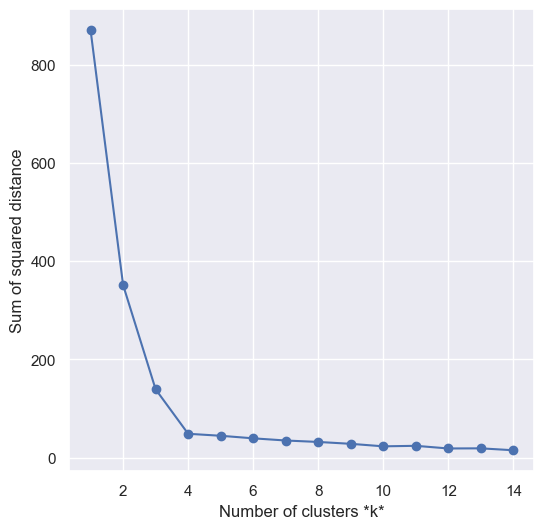

In [33]:
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1,15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

We see a clear bend after 4 clusters, so we will use 4 clusters. (Note that the SSE will always become lower when adding clusters. We choose the position where the SSE doesn't lower that much anymore). 

## 2.2 Performing k-means clustering
Refit the model with the 4 clusters

In [34]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print(kmeans.labels_)
# predict the labels of each point
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[3 1 3 3 3 3 0 1 3 1 1 1 1 1 1 2 2 0 0 2 3 1 0 2 3 0 0 3 2 2 2 1 2 2 0 3 1
 2 1 0 3 0 1 0 0 1 2 0 3 3 3 2 0 0 0 1 1 2 2 1 1 2 2 3 2 1 0 0 2 3 1 2 3 1
 3 3 0 0 2 2 2 1 0 3 2 0 2 2 3 3 3 0 3 0 0 1 1 0 1 3]
[3 1 3 3 3 3 0 1 3 1 1 1 1 1 1 2 2 0 0 2 3 1 0 2 3 0 0 3 2 2 2 1 2 2 0 3 1
 2 1 0 3 0 1 0 0 1 2 0 3 3 3 2 0 0 0 1 1 2 2 1 1 2 2 3 2 1 0 0 2 3 1 2 3 1
 3 3 0 0 2 2 2 1 0 3 2 0 2 2 3 3 3 0 3 0 0 1 1 0 1 3]


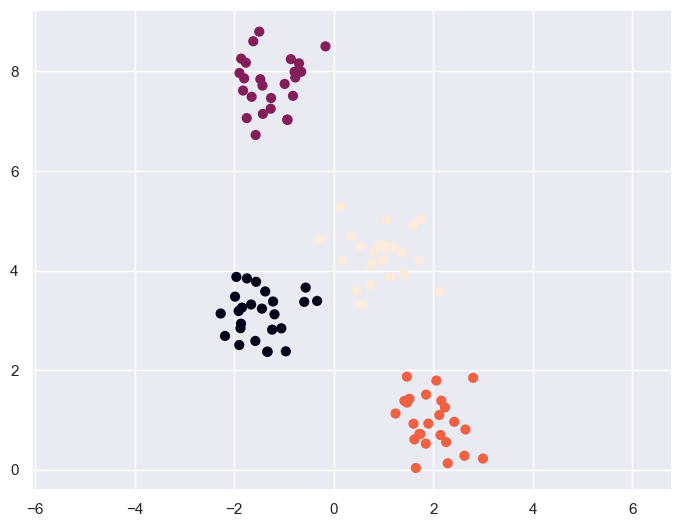

In [35]:
# plot results
fig_kmeans = plt.figure()
ax_kmeans = fig_kmeans.add_axes([0,0,1,1])
ax_kmeans.axis('equal')
#ax_kmeans.scatter(X[:, 0], X[:, 1], s=4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,s=40);

## 2.3 Weakness of k-means clustering
One way to think about K-means is that it places a circle (or a hyper-sphere) around the center of each cluster, with a predefined radius. We visualize this viewpoint here: 

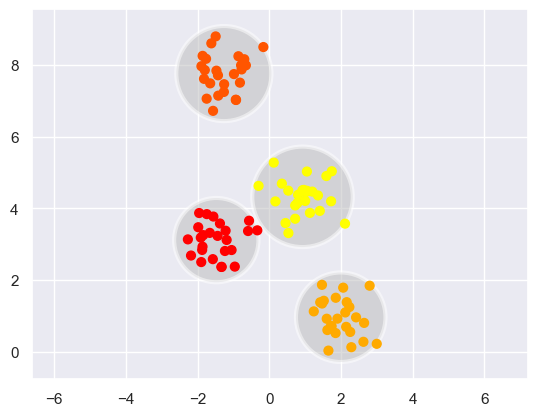

In [36]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
  labels = kmeans.fit_predict(X)

  ax = ax or plt.gca()
  ax.axis('equal')
  ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='autumn', zorder=2)

  centers = kmeans.cluster_centers_
  radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
  for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#BBBBBB', lw=3, alpha=0.5, zorder=1))
  
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

The cluster models must be circular. But what if our clusters are for example elleptical? We transform our dataset, so that we have more elleptical clusters. 

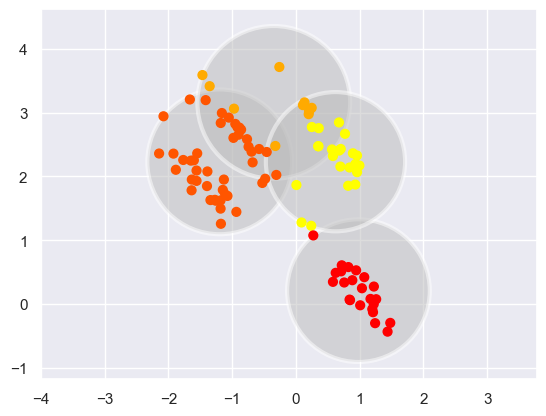

In [37]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2,2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

We can easily see the transformed clusters are NON-circular, and thus circular clusters are a bad/poor fit. 
Gaussian mixture models are a better fit for this dataset.

# 3. Gaussian mixture modeling

A Gaussian Mixture Model (GMM) attempts to find a mixture of multi-dimensional Gaussian Probability Distributions that best model any input dataset. In the most simple case, GMMs can be used for finding clusters in the same manner as k-means: 


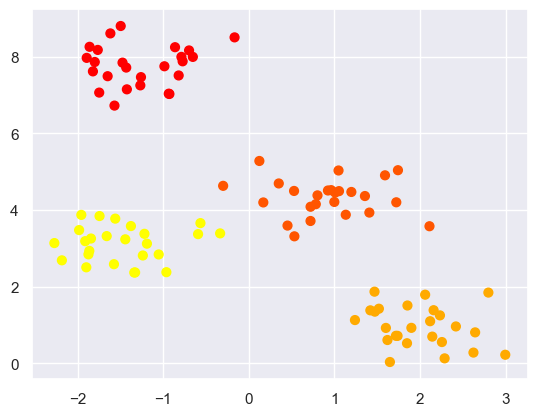

In [38]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='autumn')

Because GMM contains a probaiblistic model, it is also possible to find probabilistic cluster assignments. We can do this via predict_proba, this returns a matrix of size [n_samples, n_clusters]

In [39]:
probs = gmm.predict_proba(X)
print(probs[0:5,:].round(3))

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction. 

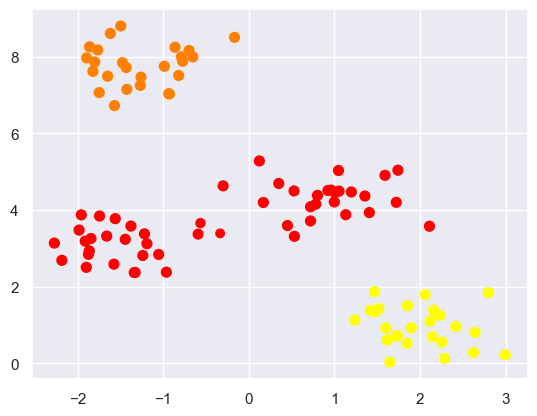

In [78]:
size = 50 * probs.max(1) ** 2
plt.scatter(X[:,0], X[:,1], c=labels, cmap='autumn', s=size)

A GMM is very similar to k-means: it uses an EM approach (Expectation-Maximization) which qualitatively does the following: 


1.   Choose starting guesses for the location and shape
2.   Repeat until converged: E-step and M-step

The result is that each cluster is associated with a smooth Gaussian model. Sometimes the global optimum can be missed. 

Here, we created a function to be able to plot the distributions:

In [79]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
  ax = ax or plt.gca()

  if covariance.shape == (2, 2):
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1,0], U[0,0]))
    width, height = 2 * np.sqrt(s)
  else:
    angle = 0
    width, height = 2 * np.sqrt(covariance)
  
  for nsig in range(1,4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  prob = gmm.predict_proba(X)
  size = 50 * prob.max(1) ** 2
  if label: 
    ax.scatter(X[:,0], X[:,1], c=labels,  cmap='autumn', zorder=2, s= size)
  else:
    ax.scatter(X[:,0], X[:,1], s=40, zorder=2)
  ax.axis('equal')

  w_factor = 0.2 / gmm.weights_.max()
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w*w_factor)

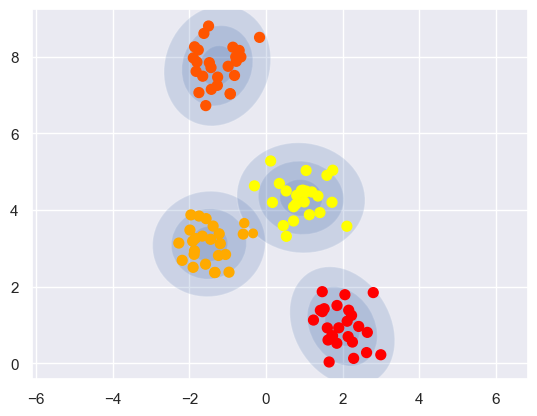

In [80]:
gmm = mixture.GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm,X)

Let's see if this indeed also works for our elleptical dataset.

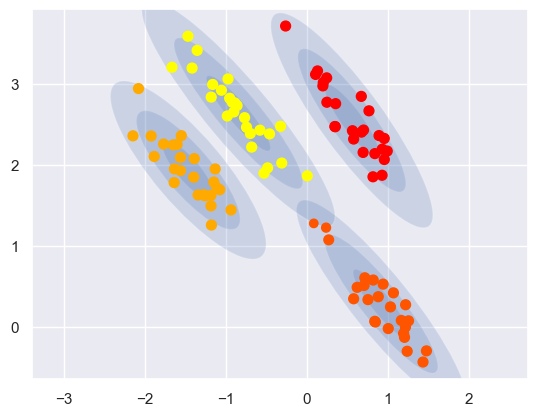

In [83]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full', random_state=56)
plot_gmm(gmm, X_stretched)

The hyperparameter "covariance_type" can be set differently, experiment with this:


*   covariance_type="diag"
*   covariance_type="spherical"
*   covariance_type="full"

# 4. Hierarchical clustering
To demonstrate hierarchical clusttering, we return to our original dataset.
First, we take a look at the dendrogram, using complete linkage

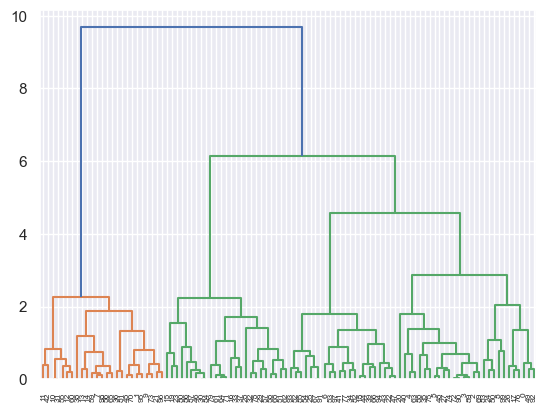

In [96]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(X, method='complete')

dendrogram(mergings,  
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

Since we want 4 clusters, let's put the distance to start clustering at 3. And then look at the clustering.

In [44]:
from scipy.cluster.hierarchy import fcluster
labels_hc = fcluster(mergings, 3, criterion='distance')

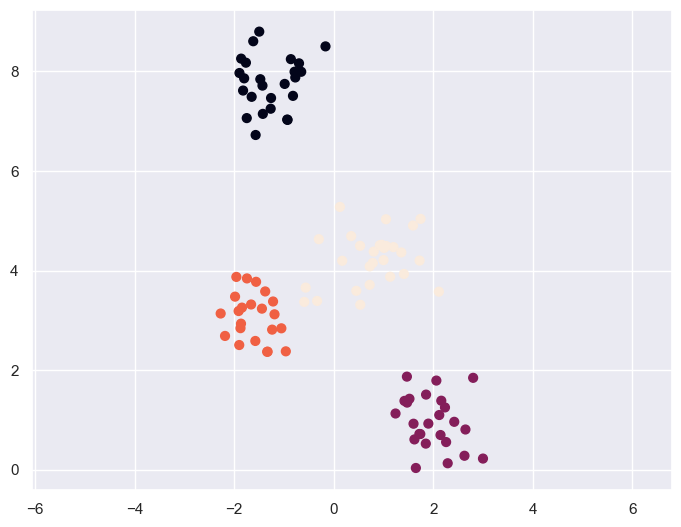

In [45]:
fig_hc_complete = plt.figure()
ax_hc_complete = fig_hc_complete.add_axes([0,0,1,1])
ax_hc_complete.axis('equal')
plt.scatter(X[:, 0], X[:, 1], c=labels_hc,s=40);


And we do the same for single linkage

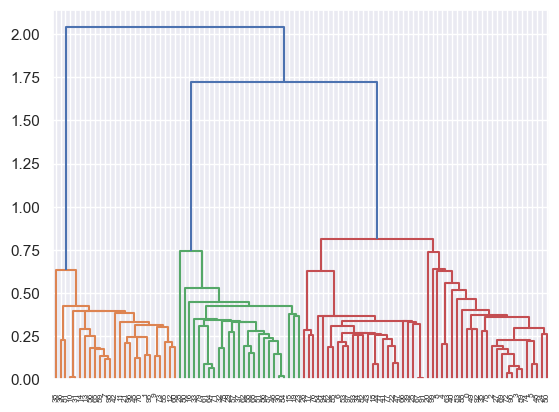

In [46]:
mergings = linkage(X, method='single')
dendrogram(mergings,          
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


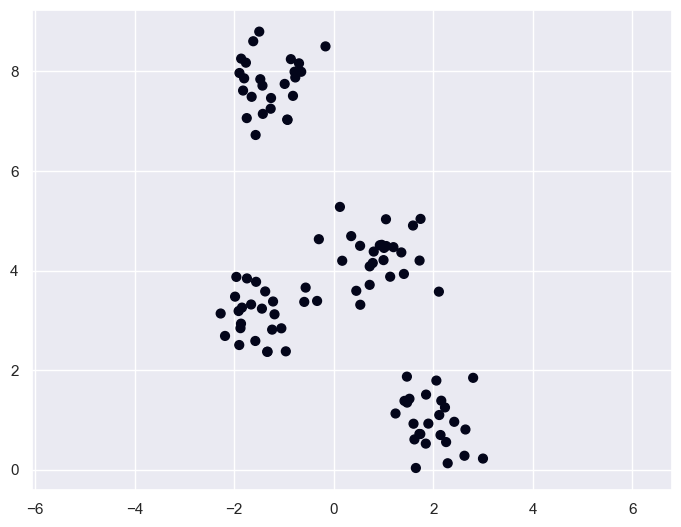

In [47]:
labels_hc_s = fcluster(mergings,3, criterion='distance')

fig_hc_single = plt.figure()
ax_hc_single = fig_hc_single.add_axes([0,0,1,1])
ax_hc_single.axis('equal')
#ax_kmeans.scatter(X[:, 0], X[:, 1], s=4)
plt.scatter(X[:, 0], X[:, 1], c=labels_hc_s,s=40);


I forgot to look at the correct distance for clustering. I will set it at 0.80

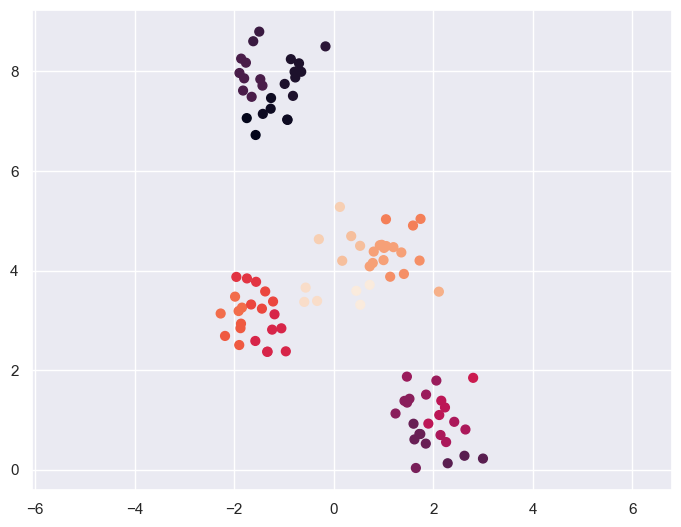

In [98]:
labels_hc_s = fcluster(mergings,0.80, criterion='distance')

fig_hc_single = plt.figure()
ax_hc_single = fig_hc_single.add_axes([0,0,1,1])
ax_hc_single.axis('equal')
#ax_kmeans.scatter(X[:, 0], X[:, 1], s=4)
plt.scatter(X[:, 0], X[:, 1], c=labels_hc_s,s=40);


See the three points in the middle: single linkage and complete linkage put them in a different cluster.

# 5. Density based clustering

To be able to perform DBscan, we first need to determine the minPoints and epsilon neighbourhood.
Since the dimension of our dataset is 2, we choose 4 minPoints (2*dimensions).

To determine the epsilon, we construct a k-distance plot.

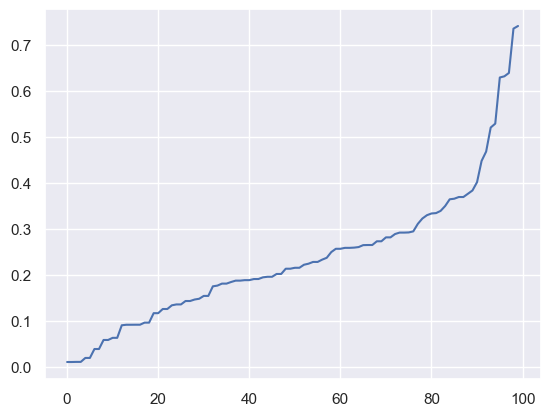

In [49]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)



7


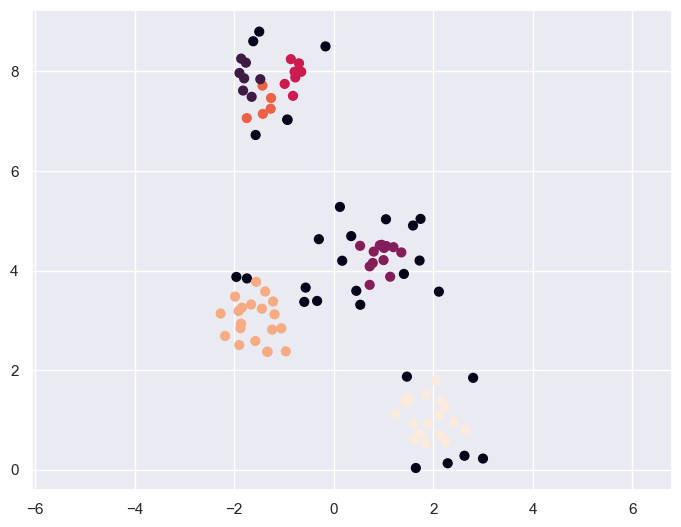

In [50]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.38, min_samples=4)
labels = dbs.fit_predict(X)
fig_hc_single = plt.figure()
ax_hc_single = fig_hc_single.add_axes([0,0,1,1])
ax_hc_single.axis('equal')
plt.scatter(X[:,0], X[:,1], c=labels, s=40)
# check the number of clusters
unq = len(np.unique(labels))
print(unq)

This results in 7 clusters. This is too much. Turns out the knn-plot wasn't very helpful here. Let's increase epsilon, so more points are considered as in the same cluster.

5
[ 0  1  0  0 -1  0  2  1 -1  1  1  1  1  1  1  3  3 -1  2  3 -1  1  2  3
  0  2 -1  0 -1  3  3  1  3  3  2  0  1  3 -1  2  0  2  1  2  2  1  3  2
  0  0  0  3  2  2  2  1  1  3  3  1  1  3  3 -1  3  1  2  2  3  0  1  3
  0  1  0  0 -1  2  3  3  3  1  2  0  3  2  3  3  0  0  0  2  0  2  2  1
  1  2  1 -1]


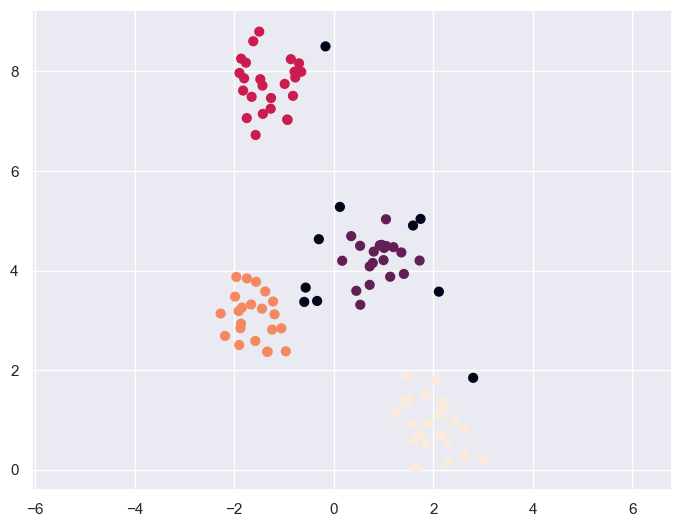

In [51]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.55, min_samples=4)
labels = dbs.fit_predict(X)

fig_hc_single = plt.figure()
ax_hc_single = fig_hc_single.add_axes([0,0,1,1])
ax_hc_single.axis('equal')
plt.scatter(X[:,0], X[:,1], c=labels, s=40)
# check the number of clusters
unq = len(np.unique(labels))
print(unq)
print(labels)

This is better, but still not perfect. We have 4 clusters + a fifth cluster of points not belonging to any cluster (labeled -1-)

NClusters(eps=0.45,ms=3)=5
NClusters(eps=0.65,ms=3)=5
NClusters(eps=0.75,ms=3)=4
NClusters(eps=0.85,ms=3)=3


<Figure size 1600x1600 with 0 Axes>

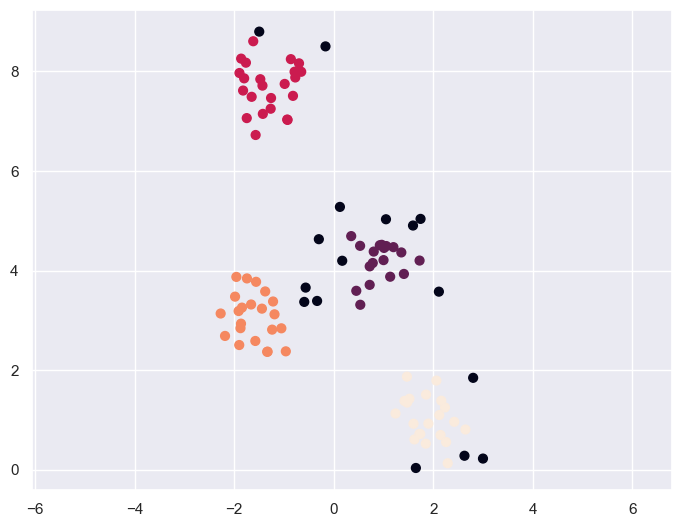

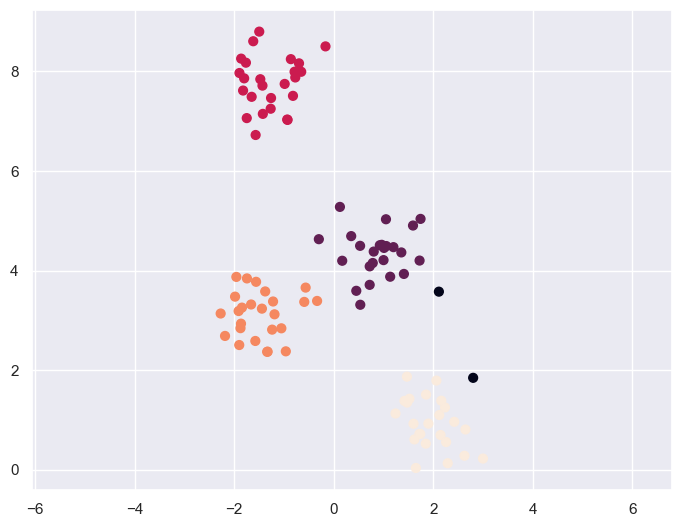

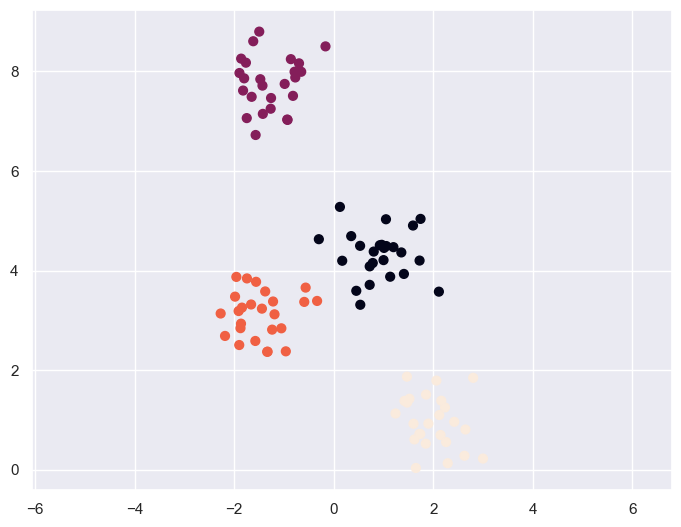

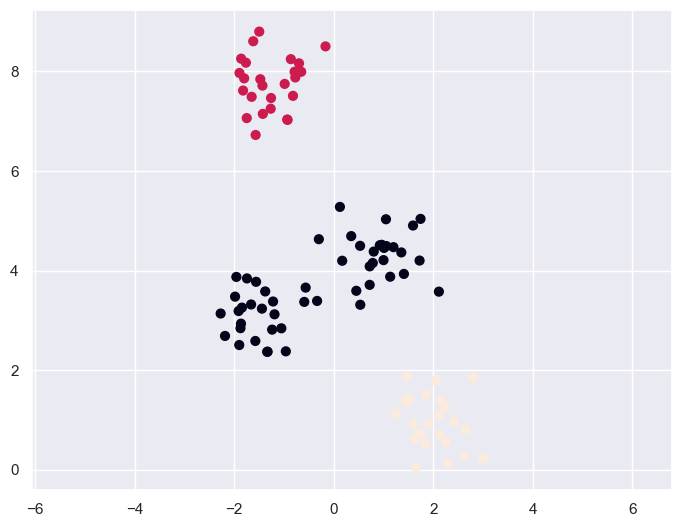

In [52]:
lpar = [0.45,0.65,0.75,0.85]

fig = plt.figure(figsize=(16,16))
for i, (eps) in enumerate(lpar):
  dbs = DBSCAN(eps=eps, min_samples=4)
  labels = dbs.fit_predict(X)
  unq = len(np.unique(labels))
  print(f"NClusters(eps={eps},ms={3})={unq}")
  ecolors = np.array(labels)
  ecolors[ecolors == -1] += unq+3
  fig_hc_single = plt.figure()
  ax_hc_single = fig_hc_single.add_axes([0,0,1,1])
  ax_hc_single.axis('equal')
  plt.scatter(X[:,0], X[:,1], c=labels, s=40)

The third option (eps= 0.75) gives us the best results.